# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [62]:
# importando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# leitura da base sinasc_RO_2019
sinasc_RO_2019 = pd.read_csv('SINASC_RO_2019.csv')

In [64]:
# ajuste na nomenclatura 'Menos de 22 semanas' da variável 'GESTACAO' para '22 semanas e menos':
sinasc_RO_2019.loc[:,'GESTACAO'] = sinasc_RO_2019.replace({'Menos de 22 semanas': '21 semanas e menos'})

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [66]:
# categorizando a variável 'APGAR5'
sinasc_RO_2019.loc[sinasc_RO_2019['APGAR5'] <= 3, 'APGAR5_ASFIXIA'] = 'asfixia grave'
sinasc_RO_2019.loc[(sinasc_RO_2019['APGAR5'] >= 4) & (sinasc_RO_2019['APGAR5'] <= 5), 'APGAR5_ASFIXIA'] = 'asfixia moderada'
sinasc_RO_2019.loc[(sinasc_RO_2019['APGAR5'] >= 6) & (sinasc_RO_2019['APGAR5'] <= 7), 'APGAR5_ASFIXIA'] = 'asfixia leve'
sinasc_RO_2019.loc[(sinasc_RO_2019['APGAR5'] >= 8), 'APGAR5_ASFIXIA'] = 'normal'

In [68]:
sinasc_RO_2019.head(n = 5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_ASFIXIA
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='APGAR5_ASFIXIA', ylabel='count'>

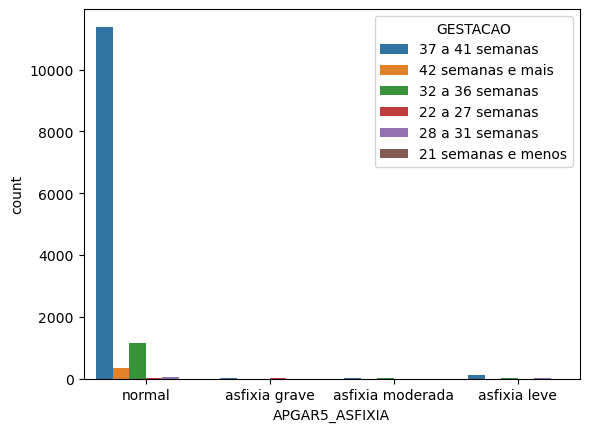

In [80]:
# gráfico de barra da distribuição APGAR5 x tempo de gestão para o sexo masculino
sns.countplot(x = 'APGAR5_ASFIXIA', hue = 'GESTACAO', data = sinasc_RO_2019.query('SEXO == "Masculino"'))

<Axes: xlabel='APGAR5_ASFIXIA', ylabel='count'>

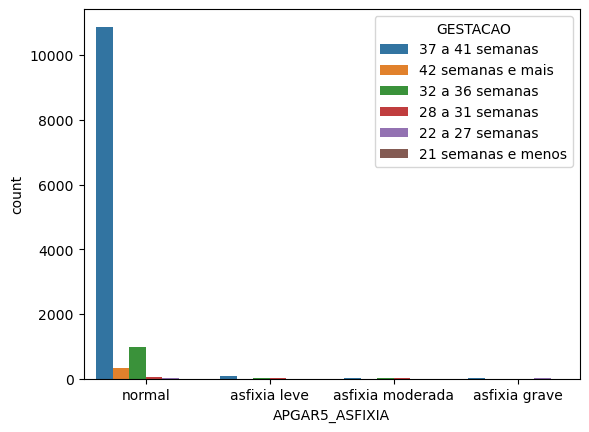

In [82]:
# gráfico de barra da distribuição APGAR5 x tempo de gestão para o sexo feminino
sns.countplot(x = 'APGAR5_ASFIXIA', hue = 'GESTACAO', data = sinasc_RO_2019.query('SEXO == "Feminino"'))

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [84]:
# tabela cruzada das variáveis 'APGAR5' (coluna) e 'GESTACAO' (linha) com o método .crosstab
tabela_cruzada_apgar5_gestacao = pd.crosstab(sinasc_RO_2019['GESTACAO'], sinasc_RO_2019['APGAR5_ASFIXIA'])
tabela_cruzada_apgar5_gestacao

APGAR5_ASFIXIA,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
21 semanas e menos,2,1,0,4
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [86]:
# cálculo do % da variável 'APAGR5' por tempo de gestação através do método .div
freq_apgar5_gestacao = tabela_cruzada_apgar5_gestacao.div(tabela_cruzada_apgar5_gestacao.sum(axis = 1), axis = 0)
freq_apgar5_gestacao

APGAR5_ASFIXIA,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
21 semanas e menos,0.285714,0.142857,0.000000,0.571429
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: ylabel='GESTACAO'>

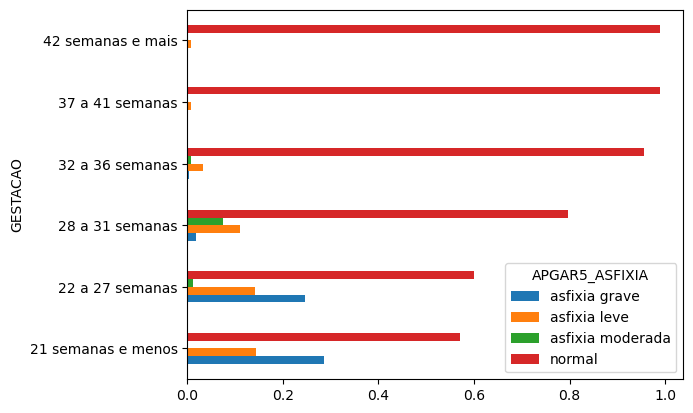

In [88]:
# gráfico de barra horizontal
# eixo y: categorias da variável 'GESTACAO'
# eixo x: valores % da variável 'APGAR5' por tipo de gestacao
freq_apgar5_gestacao.plot.barh()

##### 1) As piores notas de APGAR5, ou seja, estado de 'asfixia grave', são mais representativas nas gestações com menos de 32 semanas
##### 2) Há uma correlação das notas de APGAR5 com o tempo de gestação, ou seja, há uma frequência maior de recem-nasciados com 'asfixia grave' nos menores tempos de gestação
##### 3) Visualizando o gráfico acima, podemos corroborar, parcialmente, a hipotese dos médicos de parto prematuro nas gestações abaixo de 37 meses
##### 4) O percentual de representativade do intervalo 8 - 10 (sem asfixia, normal) é dominante nos tempos de gestação acima de 37 semanas - 0.98
##### 5) porém, nas gestações de 32 a 36 semanas, o estado 'normal' também é dominante, assim como nos tempos de gestação acima de 37 semanas

####  7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

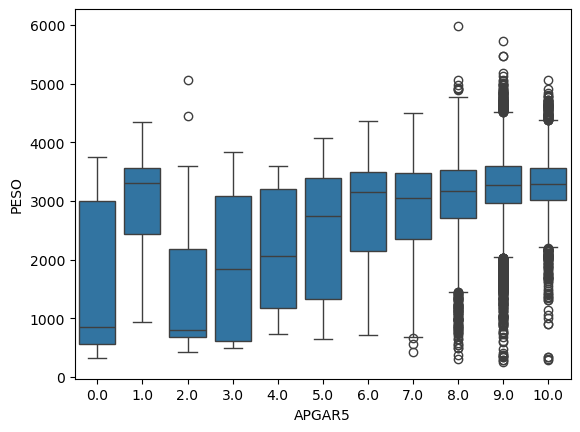

In [119]:
# gráficos boxplot de duas variáveis quantitativas utilizando o método .boxplot do seaborn
sns.boxplot(x = "APGAR5", y = "PESO", data = sinasc_RO_2019)

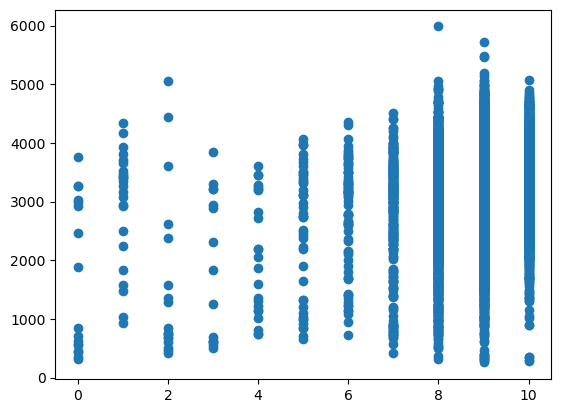

In [124]:
# gráfico de dispersão de duas variáveis quantitativas utilizando o método .scatter do matplotlib
plt.scatter(sinasc_RO_2019['APGAR5'], sinasc_RO_2019['PESO'])

##### 1) Graficamente, não há como inferir se há uma relaçãio entre as variáveis quantitativas 'PESO' e 'APGAR5'
##### 2) Observa-se, a partir dos boxplots, que quanto maior a nota APGAR5, menos disperso estão os dados. Por outro lado, há outilers acima e abaixo da
#####    distancia 1,5 * DQ, sendo DQ a distância interquartis
##### 3) Observa-se, a partir dos boxplots, que quanto menor a nota APGAR5, mais disperso estão os dados. Não foi identificado outliers
##### 4) Nota-se, a partir do gráfico de dispersão, que não há uma relação entre as variáveis estudadas. Há valores minimos e máximos em todas as notas
#####    APGAR5. Apesar de uma maior frequência dos dados no estado de asfixia normal (8 - 10), todas as notas APGAR5 possuem intervalos de peso similares